## Adaboosting, Gradient Boosting, XGBoost

we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

Ada boost için Tr based örnekli açıklama 
https://kadirguzel.medium.com/boosting-nedir-ad%C4%B1m-ad%C4%B1m-adaboost-algoritmas%C4%B1-439cce20ab9a

Gradient Boosting’de öncelikli olarak ilk yaprak(initial leaf) oluşturulur. Sonrasında tahmin hataları göz önüne alınarak yeni ağaçlar oluşturulur. Bu durum karar verilen ağaç sayısına ya da modelden daha fazla gelişme kaydedilemeyinceye kadar devam eder.

xgboost, eksik değerlerin sağ node mu yoksa sol node mu gideceğine eğitim zamanında karar verir. Hangisinin kaybı en aza indireceğini seçer. Eğitim zamanında eksik değer yoksa, varsayılan olarak yeni eksikleri doğru node a gönderir.

Eksiklerinizin dağılımında signal varsa, bu esasen modele uygundur.

Puanlama verilerinizin eksik değerleri train verilerinizden farklı şekilde dağıtılmışsa dikkatli olun. xgboost'un missing handle etmesi uygundur ancak masking e karşı koruma sağlamaz.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


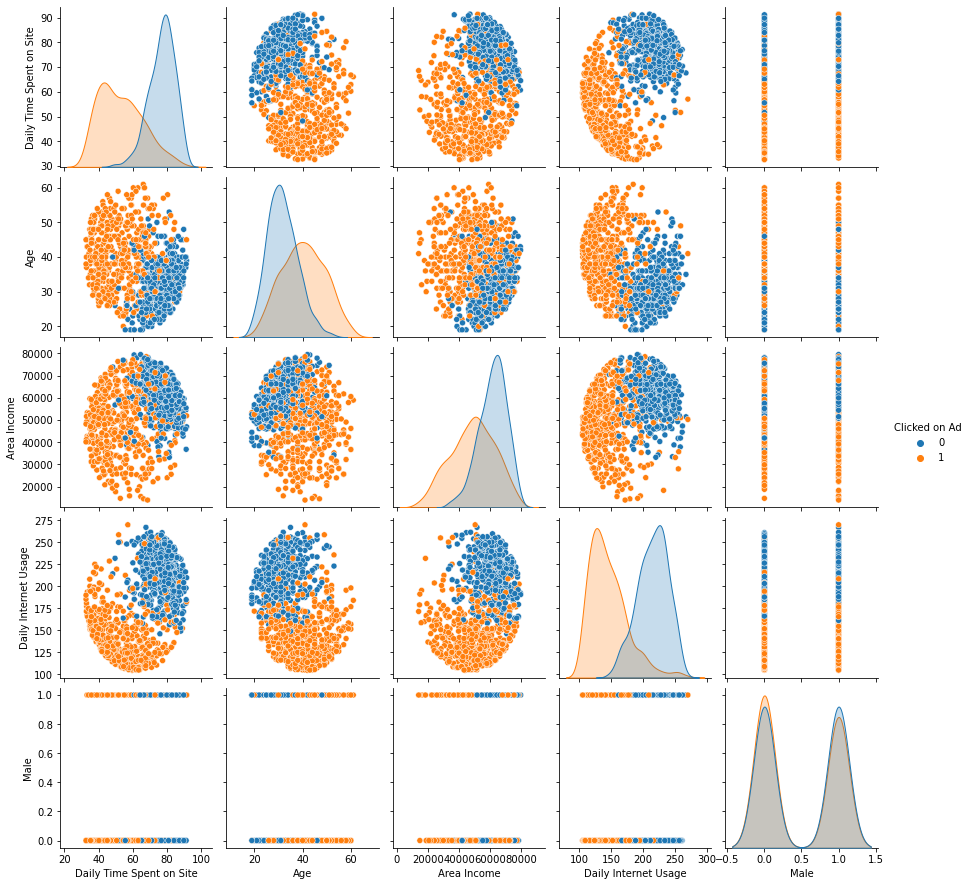

In [5]:
sns.pairplot(df, hue='Clicked on Ad')

## Train | Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

weak learner lardan öğrenme.

In [ ]:
# gini hesaplaması 1-1/2 --> binary lerde
# 1-1/3

In [10]:
model = AdaBoostClassifier(n_estimators=50, random_state=42)

In [ ]:
# base_estimator=None, kötü sonuç verdiğinde onun yerine sonucu iyileştirmek için diğer modellerde kullanılabilir. 
# En iyi sonuçlar Desicion Tree ile elde edildiğinden genellikle onlar tercih edilir.
# MOdele yanlış tahminleri vererek bir sonraki ağaçta yanlış tahminleri önlemeye azaltmaya çalışıyorum.

In [ ]:
# Emir Hoca
# - learng_rate = sen yeni oluşturacağın data setinde yanlış tahmin edilen gözlemi daha fazla oluştur ki bu tekrar eden 
# yanlış observation bir sonraki ağaçta daha fazla yer alsın ve gini impurity si artsın.

In [ ]:
# ilk ağaç en iyi ayrımı yapan feature oluyor. en iyi ayrımı yapan feature ilk ağaç olarak seçiliyor.
# weak learner ların en güçlüsü ile başlıyorum. bu seçimi arka planda dt algoritması yapıyor.

In [ ]:
# tek bir kök ve yapraktan oluşan yapıya stump deniyor.

In [ ]:
# value = [0 , 1]
# ilk seçeceği ağacın, tek bir soruda en iyi ayrımı yapan hangi feature olduğuna karar verir, bunu ise ADA BOOST ile seçer.

In [ ]:
# Johnson Hoca
# En iyi agacı DT algoritması ile seçer. Adaboostun arkasında bu işlemi DT gerçekleştirir

In [15]:
# ilk ağaçta yanlış gözlemleri sayılarını artırarak  ikinci ağaçta olmadı üçüncü ağaçta gini si düşük kümeye düşmesini 
# sağlayarak doğru tahmin edilmesini sağlıyor.

In [12]:
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [18]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [19]:
from sklearn.tree import plot_tree

In [20]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [21]:
# targets = df["Clicked on Ad"].astype("str")

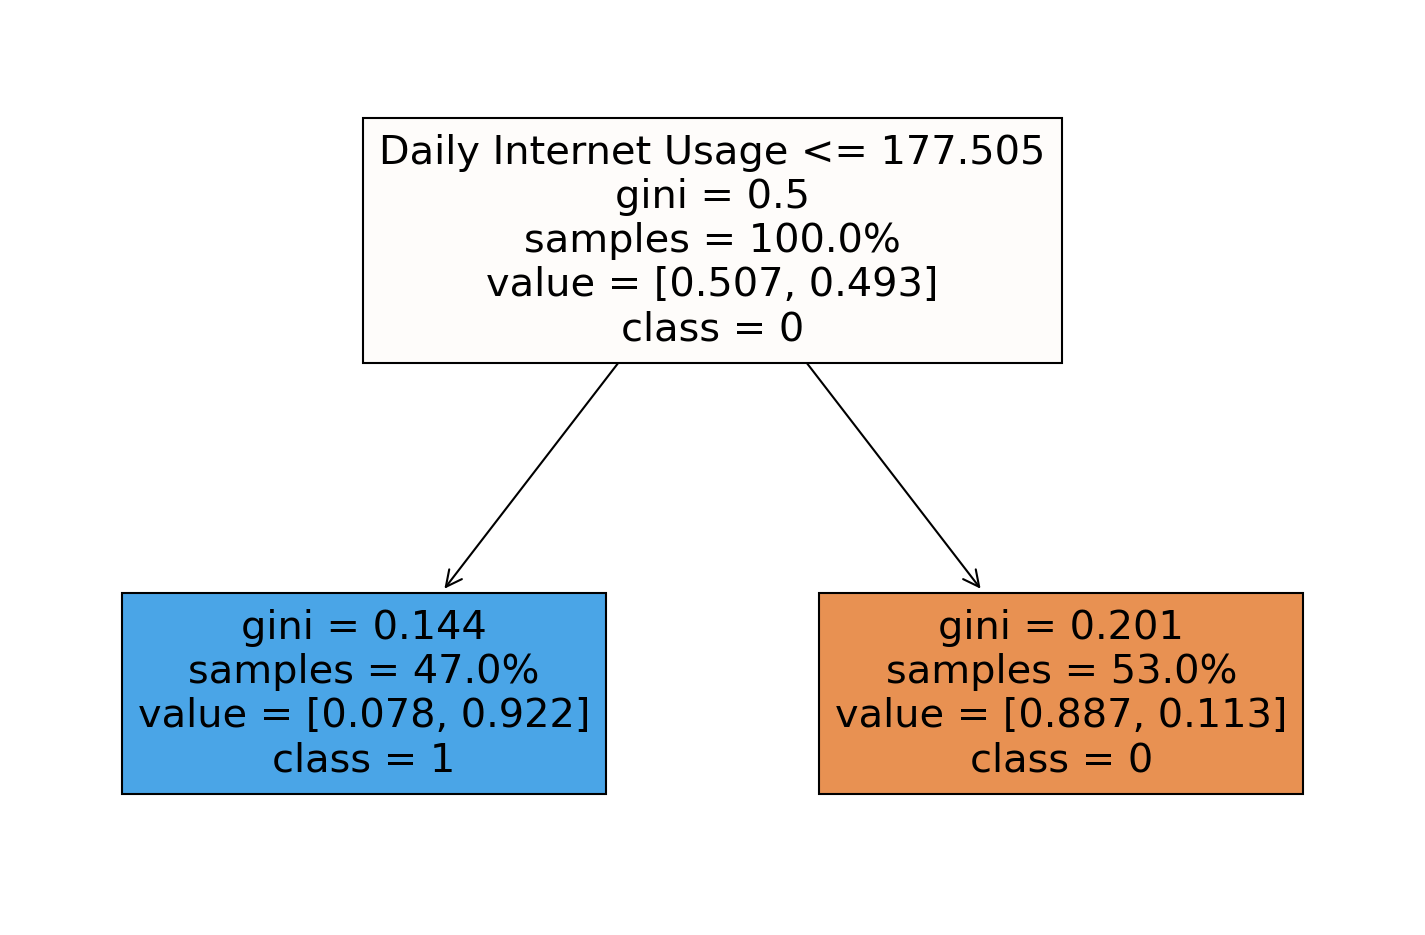

In [22]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str")
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique(), proportion=True);

In [23]:
model.estimator_errors_

array([0.09666667, 0.15660636, 0.29526371])

In [24]:
1/2*np.log((1-0.09666667)/0.09666667) # 1. ağaç ağırlığı

1.117411476360216

In [25]:
1/2*np.log((1-0.15660636)/0.15660636) # 2. ağaç ağırlığı

0.8418492023096668

In [26]:
1/2*np.log((1-0.29526371)/0.29526371) # 3. ağaç ağırlığı

0.43497739343711583

In [ ]:
# ağaçlarımı belirledikten sonra modelden hata oranımı görebiliyorum.
# burada ilk ağaç en iyi sonucu vermiş
# bu hatalarla ağaçlarımın ağırlıklarını hesaplayabiliyorum
# daha sonra predict yapıyorum. ilk ağaç 1, ikinci ağaç 0, üçüncü ağaç 0# burada 1 in ve 0 ın ağırlıklarını topluyorum.
# hangisinin toplam ağırlığı daha fazla ise ona karar veriyor

In [ ]:
# learning rate: yanlış tahmin edilen feature ın ne kadar artırılacağına karar veriyor. 1 en fazla
# mümkün olduğu kadar küçük learning rate, büyük ağaç sayısı
# adaboost un en büyük handikaplarından birisi yanlış tahminlerle agresif mücadele overfitting e götürüyor.
# mümkün olduğu kadar learning rate ve ağaç sayısı arasında denge kurmak lazım

## Analyzing performance as more weak learners are added.

In [27]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds)
    
    error_rates.append(err)

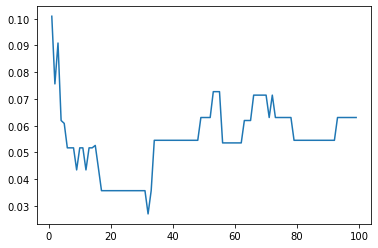

In [28]:
plt.plot(range(1,100), error_rates)

In [29]:
model.feature_importances_

array([0.24242424, 0.15151515, 0.25252525, 0.35353535, 0.        ])

In [30]:
feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.242424
Age,0.151515
Area Income,0.252525
Daily Internet Usage,0.353535
Male,0.000000


In [31]:
imp_feats = feats.sort_values("Importance")

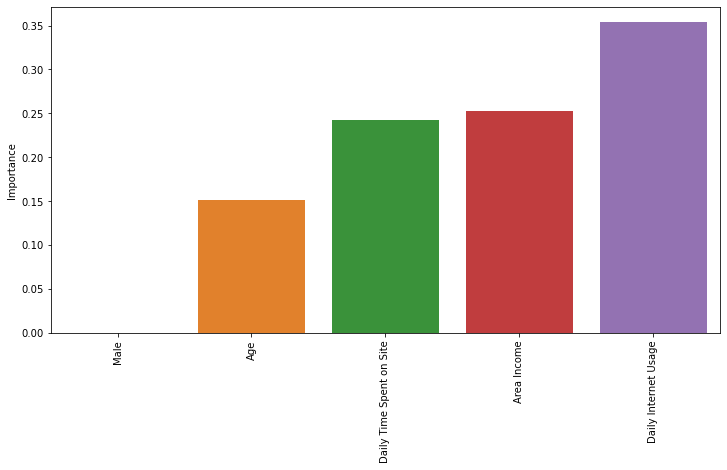

In [32]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

## Gridsearch

In [ ]:
# modelimde overfitting veya underfitting sorunu varsa, gridsearch en optimal parametreleri bularak bunlara çözüm üretiyor.

In [ ]:
# bu örnek için skorlarımda iyileştirme sağlamamış olsa bile optimal parametreleri bularak overfitting e engel oluyor.

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = AdaBoostClassifier(random_state=42)

In [35]:
param_grid = {"n_estimators": [17, 20, 100, 500], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [36]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1')

In [37]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [17, 20, 100, 500]},
             scoring='f1')

In [38]:
ada_grid_model.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [39]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [40]:
y_pred = ada_grid_model.predict(X_test)

In [41]:
ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [42]:
y_train_pred = ada_grid_model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



## Evaluating ROC Curves and AUC

In [43]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

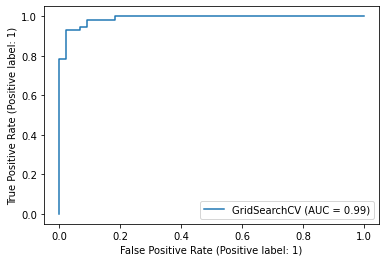

In [44]:
plot_roc_curve(ada_grid_model, X_test, y_test)

## Cross Validate

In [45]:
# yukarıda aldığım skorların tutarlı olup olmadığını cv ile görüyorum

In [46]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.198025,0.041097,0.944444,0.934783,0.955556,0.945055,0.972346
2,0.174955,0.038969,0.977778,1.000000,0.955556,0.977273,0.980741
3,0.168900,0.037981,0.977778,1.000000,0.955556,0.977273,0.996543
4,0.204879,0.041976,0.988889,0.978261,1.000000,0.989011,1.000000
5,0.225209,0.052001,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.241908,0.038958,0.955556,0.934783,0.977273,0.955556,0.992836
7,0.178899,0.039995,0.922222,0.951220,0.886364,0.917647,0.974061
8,0.198955,0.039996,0.966667,1.000000,0.931818,0.964706,0.986166
9,0.194052,0.037999,0.977778,1.000000,0.954545,0.976744,0.991107
10,0.183254,0.038983,0.966667,0.955556,0.977273,0.966292,0.990119


In [47]:
df_scores.mean()[2:]

test_accuracy     0.967778
test_precision    0.975460
test_recall       0.959394
test_f1           0.966956
test_roc_auc      0.988392
dtype: float64

## Gradient Boosting Modelling and Model Performance

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
# Gradient Boost, Logistic Regression algoritmasını kullanır.
# LOG Rec
# Hatırlayalım Log reg i
# İlk başta bütün fiyatların ort alır ve tüm gözlemlere o ort u verir.
# Sonra o ort fiyattan bütün geröek fiyatları çıkarıp residual elde eder.
# Sonra o residuallardan geröek fiyatı tahmin etmeye çalışır.
# Grad Desc
# Tıklayanların ve tıklamayanların oranını alıyor.
# [(np.e^np.log(4/2))/(1+np.e^np.log(4/2))] ilk residual ı belirleme formulüdür. Yani bir tane logaritmada çoğunluğun azınlığa olan oranını alıyor. Logistic reg deki değerimi olasılığa çeviriyor.
# tıklayanların tıklamyanlara oranının logaritmasını alıyor.

In [75]:
model = GradientBoostingClassifier(random_state=42)

In [76]:
# çoğunluğu azınlığa bölerek bir değer elde ediyoruz. bu değerle log regressionın olasılığa çevirme formülünü kullanarak 
# ilk residual olasılığımızı buluyoruz. bu formül neticesinde değerlerimizden 1 olanlar için 1 e 0 olanlar için 0a çekmeye 
# çalışacak. gradient bosst. classifier ilk işlemi yaparken ilk esidualı böyle belirliyor.

In [77]:
np.log(4/2)

0.6931471805599453

In [78]:
(np.e**np.log(4/2))/(1+np.e**np.log(4/2))

0.6666666666666666

In [79]:
0.7 + (0.1*0.25) + (0.1*0.15)

0.74

In [80]:
# ilk elde ettiğim residual değeri ile diğer ağaçlarda elde ettiğim residual değerlerini learning rate ile çarpıyorum
# 0.5 den büyükse 1 e, küçükse 0 a götürüyor
# bir olasılık üzerinden residual değerlerini hesaplıyor.

In [81]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [82]:
y_pred = model.predict(X_test)

In [83]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



In [84]:
y_train_pred = model.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [85]:
model.feature_importances_

array([2.07472544e-01, 2.71306001e-02, 5.22078111e-02, 7.12911699e-01,
       2.77345392e-04])

In [86]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.207473
Age,0.027131
Area Income,0.052208
Daily Internet Usage,0.712912
Male,0.000277


In [87]:
imp_feats = feats.sort_values("Importance")

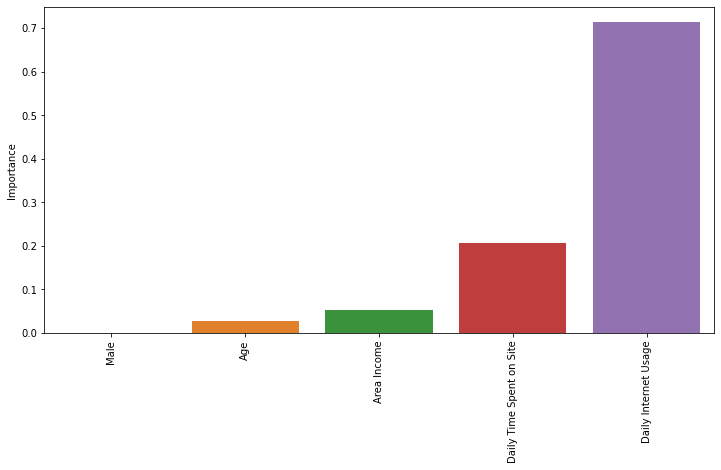

In [88]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index, y='Importance')

plt.xticks(rotation=90);

## Gridsearch

In [89]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [90]:
gb_model = GradientBoostingClassifier(random_state=42)

In [91]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [92]:
grid.best_estimator_

GradientBoostingClassifier(max_features=3, random_state=42, subsample=0.5)

In [93]:
y_pred = grid.predict(X_test)

In [94]:
gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [95]:
y_train_pred = grid.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  4 440]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       456
           1       1.00      0.99      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



## Evaluating ROC Curves and AUC

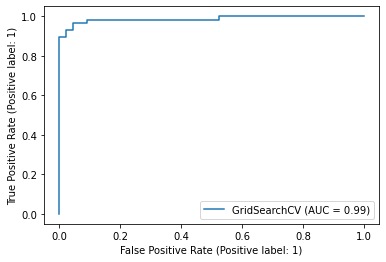

In [96]:
plot_roc_curve(grid, X_test, y_test);

## Cross Valudate

In [ ]:
# cross validate ile aldığım skorlar tutarlı ise 

In [98]:
model = GradientBoostingClassifier(n_estimators=300, random_state=42, subsample=0.5, 
                                   max_features =2)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.394984,0.009995,0.922222,0.931818,0.911111,0.921348,0.963457
2,0.316816,0.021004,0.966667,1.000000,0.933333,0.965517,0.985679
3,0.281858,0.008995,0.977778,1.000000,0.955556,0.977273,0.998025
4,0.289838,0.008995,0.955556,0.955556,0.955556,0.955556,0.998025
5,0.295830,0.008996,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.265841,0.008995,0.944444,0.914894,0.977273,0.945055,0.988142
7,0.260850,0.008999,0.933333,0.975000,0.886364,0.928571,0.958498
8,0.260837,0.008988,0.955556,1.000000,0.909091,0.952381,0.993577
9,0.284851,0.008008,0.966667,0.955556,0.977273,0.966292,0.992095
10,0.268824,0.015991,0.977778,0.977273,0.977273,0.977273,0.992589


In [99]:
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.971010
test_recall       0.948283
test_f1           0.958927
test_roc_auc      0.987009
dtype: float64

## XG Boosting Modelling and Model Performance

In [109]:
from xgboost import XGBClassifier

In [110]:
# booster: buna dokunma. akademik seviyede uğraşanlar için
# max_depth:# learning_rate: artırıp azaltabiliriz
# learning_rate: artırıp azaltılabilir
# min_child_weight: ileri matematik. modelişmde overfitting varsa değeri 0,5-1 arasına çekerek düzeltip düzeltmediğine bakılabşlir
# gamma: 0 ile sonsuz arasında. overfitting varsa önce min_child_weight, sonra gamma. değerler deneme-yanılma. çok dokunulan bir parametre değil
# sub_sample: 0,5-0,7.
# colsamplebytree: maxtree yok. yerine bu
# colsamplebylevel: üstteki 2 sini kullanıyorsan buna gerek yok
# alpha: l1 lasso, l2 ridge
# reg_alpga, reg_lambda: dokunma

Parametrelere bak. shift + tab + tab
gama değeri çok önemli, çok uğraştırır, kaggle da en çok bununla uğraıyorlar.
önce mean_child_weight i 0.5 ile 1 arasında denenir sonra gama yı değerlendiririz. 20 ile başlayıp 1000000 bile verilebilri.
sub_sample = her ağacı bölerken kullanılacak örneüin değeri.
max_feature yerine colsample_bytree vardır ama bu orandır.
colsample_bylevel var ama bunun yerine sub_sample ve colsample_bytree kombini kullanılır.

In [111]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

[13:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [112]:
y_pred = xgb.predict(X_test)

In [113]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [114]:
y_train_pred = xgb.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[456   0]
 [  0 444]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



In [115]:
xgb.feature_importances_

array([0.21512508, 0.06562018, 0.07021368, 0.6299656 , 0.01907539],
      dtype=float32)

In [116]:
feats = pd.DataFrame(index=X.columns,data=xgb.feature_importances_,columns=['Importance'])
feats

,Importance
Daily Time Spent on Site,0.215125
Age,0.065620
Area Income,0.070214
Daily Internet Usage,0.629966
Male,0.019075


In [117]:
imp_feats = feats.sort_values("Importance")

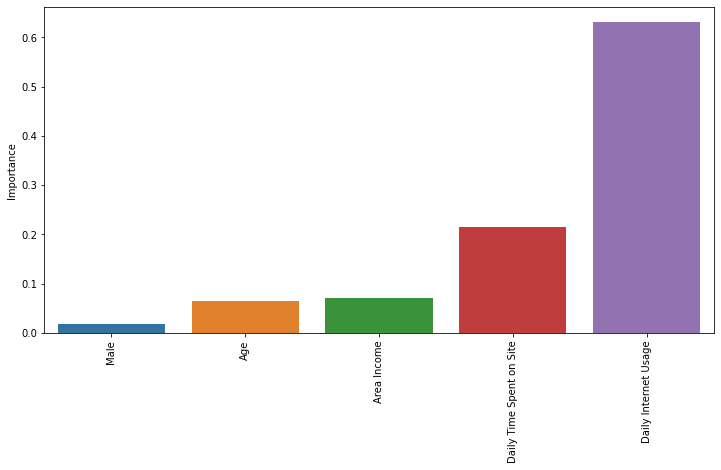

In [118]:
plt.figure(figsize=(12,6))
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

## Gridsearch

In [ ]:
# n_estimator, max_depth, learning_rate en çok kullanılan parametreler
# öncelikle n_estimator sayısını artırmak gerekli
# model çalıştı ise öncelikle onu pickle ile kaydet. büyük datalarda hayat kurtarır

In [122]:
param_grid = {"n_estimators":[100, 300],'max_depth':[3,5,6], "learning_rate": [0.1, 0.3],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [123]:
xgb_model = XGBClassifier(random_state=42)

In [124]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[13:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [125]:
xgb_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100,
 'subsample': 0.5}

In [127]:
y_pred = xgb_grid.predict(X_test)

In [128]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [129]:
y_train_pred = xgb_grid.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[455   1]
 [ 10 434]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



## Evaluating ROC Curves and AUC

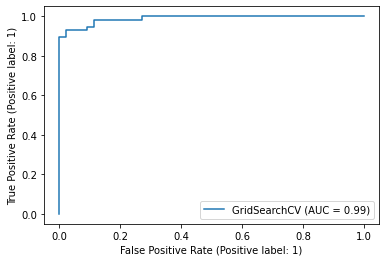

In [130]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Cross Validate

In [131]:
model = XGBClassifier(n_estimators=300, random_state=42, subsample=1, learning_rate= 0.1, colsample_bytree=0.5,
                                  max_dept=6)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Toshiba\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_dept" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
1,0.615318,0.022993,0.944444,0.934783,0.955556,0.945055,0.976790
2,0.504591,0.051972,0.977778,1.000000,0.955556,0.977273,0.987654
3,0.467779,0.025987,0.977778,1.000000,0.955556,0.977273,0.995062
4,0.598170,0.022987,0.988889,0.978261,1.000000,0.989011,0.999506
5,0.567517,0.032862,0.988889,0.977778,1.000000,0.988764,0.999506
6,0.611702,0.038997,0.933333,0.913043,0.954545,0.933333,0.988636
7,0.497435,0.034419,0.933333,0.952381,0.909091,0.930233,0.974308
8,0.583880,0.038978,0.955556,1.000000,0.909091,0.952381,0.992589
9,0.597742,0.034980,0.966667,1.000000,0.931818,0.964706,0.991107
10,0.682330,0.024004,0.966667,0.955556,0.977273,0.966292,0.996542


In [132]:
df_scores.mean()[2:]

test_accuracy     0.963333
test_precision    0.971180
test_recall       0.954848
test_f1           0.962432
test_roc_auc      0.990170
dtype: float64

## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  3]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        44
           1       0.95      0.96      0.96        56

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



## Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[38  6]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        44
           1       0.90      0.96      0.93        56

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



## Logistic Regression

In [136]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [137]:
scaler = MinMaxScaler()

In [138]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[43  1]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        44
           1       0.98      0.95      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## SVM

In [145]:
# SVM de mutlaka GridSearch yapılmalı. Skorları çok etkiliyor. SVM de GridSearch farz

In [142]:
from sklearn.svm import SVC

In [143]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[42  2]
 [ 2 54]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.96      0.96      0.96        56

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



## Comparing Models

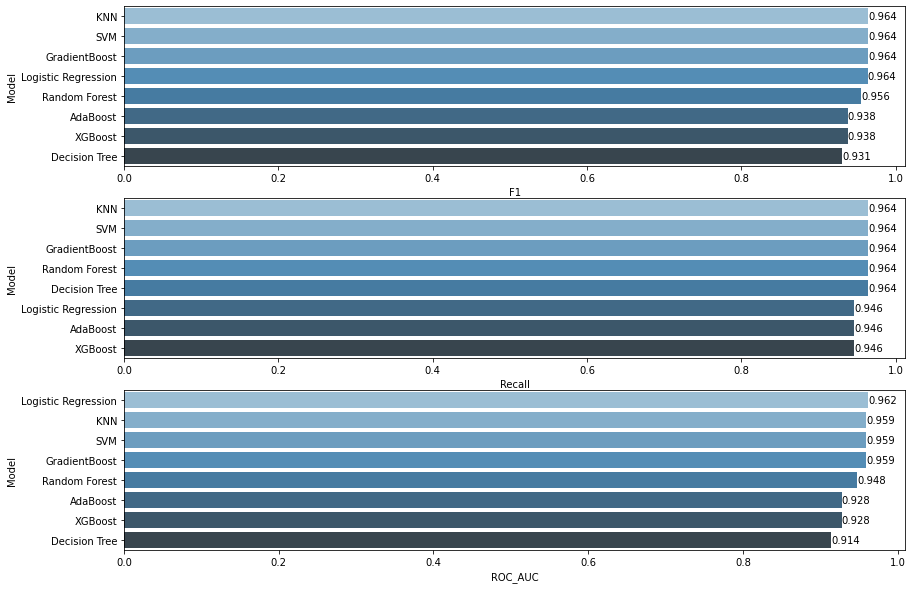

In [144]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# Steve Hoca
# datanız sadece continues featurelardan oluşuyorsa linearreg, logreg, SVM ön plana çıkıyor.
# arkadaşlar classification problemlerinde imbalanced datalarda algoritmaların gücüne bakmak lazım. Er meydanı orası.
# Her datanın kendi hikayesi var, dolayısıyla skorlara yapılacak yorumlar da buna göre değişiyor.